In [1]:
from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import  ImageDataGenerator, img_to_array, load_img

from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
#EDA

len(os.listdir("/content/drive/MyDrive/data/dataset/train"))

15

In [ ]:
train_datagen= ImageDataGenerator(zoom_range=0.5,shear_range= 0.3 ,horizontal_flip=True,preprocessing_function= preprocess_input)

val_datagen=ImageDataGenerator(preprocessing_function= preprocess_input)

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/data/dataset/train",target_size=(256,256),batch_size=32)

val=val_datagen.flow_from_directory(directory="/content/drive/MyDrive/data/dataset/validation",target_size=(256,256),batch_size=32)

test=test_datagen.flow_from_directory(directory="/content/drive/MyDrive/data/dataset/test",target_size=(256,256),batch_size=32)


Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.


In [ ]:
t_img,label = train.next()

In [ ]:
def plotImage(img_arr,label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))

    plt.show()

In [ ]:
plotImage(t_img[:3],label[:3])

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

# **BUILDING** **OUR** **MODEL**

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x= Flatten()(base_model.output)

x=Dense(units =15 ,activation='softmax')(x)



#creating our model
model= Model(base_model.input,x)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(optimizer= 'adam'  , loss = keras.losses.categorical_crossentropy , metrics =['accuracy'])

# **EARLY STOPPING AND MODEL CHECK POINT**

In [ ]:
from keras.callbacks import ModelCheckpoint ,EarlyStopping

#early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01 ,patience = 3, verbose= 1)


#model check point
mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor= 'val_accuracy',
                     min_delta= 0.01 ,
                     patience = 3,
                     verbose= 1,
                     save_best_only= True)



cb=[es,mc]


In [ ]:
his = model.fit_generator(train ,
                          steps_per_epoch =16,
                          epochs= 50 ,
                          verbose = 1,
                          callbacks=cb ,
                          validation_data= val ,
                          validation_steps= 16 )

<ipython-input-48-1f75b53fb020>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train ,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 20.0190 - accuracy: 0.3008
Epoch 1: val_accuracy improved from -inf to 0.46289, saving model to best_model.h5
16/16 [==============================] - 91s 6s/step - loss: 20.0190 - accuracy: 0.3008 - val_loss: 13.6995 - val_accuracy: 0.4629
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.6336 - accuracy: 0.5391
Epoch 2: val_accuracy improved from 0.46289 to 0.58594, saving model to best_model.h5
16/16 [==============================] - 81s 5s/step - loss: 13.6336 - accuracy: 0.5391 - val_loss: 8.8000 - val_accuracy: 0.5859
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 9.3292 - accuracy: 0.6171
Epoch 3: val_accuracy improved from 0.58594 to 0.71680, saving model to best_model.h5
16/16 [==============================] - 79s 5s/step - loss: 9.3292 - accuracy: 0.6171 - val_loss: 6.7952 - val_accuracy: 0.7168
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 7.5

In [ ]:
h = his.history
h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

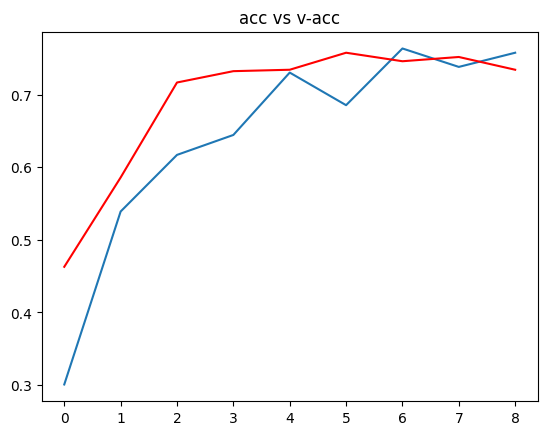

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c="red")
plt.title("acc vs v-acc")
plt.show()

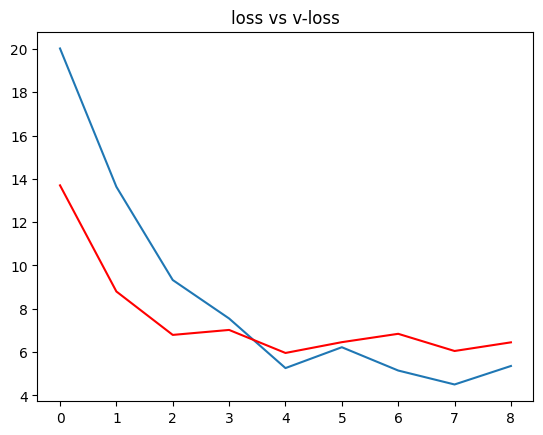

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best_model

from keras.models import load_model

model= load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]


print(f"the accuracy of your model is {acc*100} %")

<ipython-input-53-cc7c3ca5f4d7>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


the accuracy of your model is 76.57004594802856 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def  prediction(path):

  img = load_img(path, target_size=(256,256))

  i = img_to_array(img)

  im = preprocess_input(i)


  img = np.expand_dims(im , axis=0)

  pred = np.argmax(model.predict(img) )

  print(f" the image belongs to { ref[pred]}")



In [ ]:
path ="/content/drive/MyDrive/data/dataset/test/Tomato_Bacterial_spot/06f23987-e01b-40dc-98ef-a5b33e86bc90___UF.GRC_BS_Lab Leaf 0308.JPG"
prediction (path)

1/1 [==============================] - 0s 81ms/step
 the image belongs to Tomato_Late_blight


In [ ]:
path="/content/drive/MyDrive/data/dataset/test/Pepper__bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG"
prediction(path)

1/1 [==============================] - 0s 17ms/step
 the image belongs to Pepper__bell___Bacterial_spot


In [ ]:
path="/content/drive/MyDrive/data/dataset/train/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG"
prediction(path)

1/1 [==============================] - 0s 33ms/step
 the image belongs to Pepper__bell___healthy
